##<code>AUTORES</code>
- Bruno Rafael Carvalho Coelho
- Gustavo Mendes Queiroz

O versionamento do código pode ser encontrado no repositório:

#PROJETO
## 1. <b>Introdução </b>

O Programa Universidade Para Todos (Prouni) oferta bolsas de estudo, integrais e parciais (50% do valor da mensalidade do curso), em cursos de graduação e sequenciais de formação específica, em instituições de educação superior privadas. O público-alvo do programa é o estudante sem diploma de nível superior. [(MEC, 2023)](https://acessounico.mec.gov.br/prouni)

O candidato pré-selecionado deve comprovar renda familiar bruta mensal, por pessoa, de até 1,5 salário mínimo, para obter a bolsa integral, que cobre a totalidade do valor da mensalidade do curso. Já para a bolsa parcial, que cobre (50%) do valor da mensalidade, a renda mensal per capita exigida é de até 3 salários mínimos.

## 2. <b>Jusfiticativa</b>
Sendo assim, o projeto tem como motivação analisar os dados e ver se o programa atende as necessidades dos estudantes brasileiro com maior vunerabilidade economica. Considerando as variavéis de raça, gênero e posição social.

## 3. <b>Objetivo</b>
Mostrar através dos dados oferecidos pelo governo que o objetivo do programa cumpre o papel a qual foi criado. Nos anos de 2015 a 2020


##Dados Carregados

Os arquivos analisados podem ser encontados nesse [link](https://dados.gov.br/dados/conjuntos-dados/mec-prouni).
Os dados são publicos e de fácil acesso.

Contudo, além de forncer a origem dos dados, achamos interessante exportar os dados a uma pasta do Google Drive. E carregar de lá. Importamos a biblioteca <code>pandas</code>. Para trabalhar com os arquivos, sendo que eles se encontram no formado .cvs

In [80]:
import pandas as pd

Os arquivos são separados por ano. De 2015 a 2020. Precisamentos concantenar as informações para que a manipulação seja eficas.

In [81]:
df1 = pd.read_csv('/content/drive/MyDrive/Dados - mineração de dados/pda-prouni-2015.csv', sep=';', encoding = 'latin-1')
df2 = pd.read_csv('/content/drive/MyDrive/Dados - mineração de dados/pda-prouni-2016.csv', sep=';', encoding = 'latin-1')
df3 = pd.read_csv('/content/drive/MyDrive/Dados - mineração de dados/pda-prouni-2017.csv', sep=';', encoding = 'latin-1')
df4 = pd.read_csv('/content/drive/MyDrive/Dados - mineração de dados/pda-prouni-2018.csv', sep=';', encoding = 'latin-1')
df5 = pd.read_csv('/content/drive/MyDrive/Dados - mineração de dados/pda-prouni-2019.csv', sep=';', encoding = 'latin-1')
df6 = pd.read_csv('/content/drive/MyDrive/Dados - mineração de dados/pda-prouni-2020.csv', sep=';', encoding = 'latin-1')

Antes de concaternar as informação, precisamos ver se o numero de colunas, o formato e as ordens das informações estão corretas.

###1.NUMERO DE COLUNAS

In [82]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)


(252650, 15)
(239262, 15)
(236636, 15)
(241032, 15)
(241032, 15)
(166830, 17)


O ultimo dataframe possui 2 colunas a mais em relação as outras. Vemos quais são essas colunas e excluimos

In [83]:
x = df1.shape[0]+df2.shape[0]+df3.shape[0]+df4.shape[0]+df5.shape[0]+df6.shape[0]
print(x)

1377442


In [84]:
list_df = [df1, df2, df3, df4, df5, df6]
for i, df in enumerate(list_df, start=1):
    print(f"Colunas do DataFrame {i}:")
    print(df.columns)
    print("\n")

Colunas do DataFrame 1:
Index(['ANO_CONCESSAO_BOLSA', 'CODIGO_EMEC_IES_BOLSA', 'NOME_IES_BOLSA',
       'TIPO_BOLSA', 'MODALIDADE_ENSINO_BOLSA', 'NOME_CURSO_BOLSA',
       'NOME_TURNO_CURSO_BOLSA', 'CPF_BENEFICIARIO_BOLSA',
       'SEXO_BENEFICIARIO_BOLSA', 'RACA_BENEFICIARIO_BOLSA',
       'DT_NASCIMENTO_BENEFICIARIO', 'BENEFICIARIO_DEFICIENTE_FISICO',
       'REGIAO_BENEFICIARIO_BOLSA', 'SIGLA_UF_BENEFICIARIO_BOLSA',
       'MUNICIPIO_BENEFICIARIO_BOLSA'],
      dtype='object')


Colunas do DataFrame 2:
Index(['ANO_CONCESSAO_BOLSA', 'CODIGO_EMEC_IES_BOLSA', 'NOME_IES_BOLSA',
       'TIPO_BOLSA', 'MODALIDADE_ENSINO_BOLSA', 'NOME_CURSO_BOLSA',
       'NOME_TURNO_CURSO_BOLSA', 'CPF_BENEFICIARIO_BOLSA',
       'SEXO_BENEFICIARIO_BOLSA', 'RACA_BENEFICIARIO_BOLSA',
       'DT_NASCIMENTO_BENEFICIARIO', 'BENEFICIARIO_DEFICIENTE_FISICO',
       'REGIAO_BENEFICIARIO_BOLSA', 'SIGLA_UF_BENEFICIARIO_BOLSA',
       'MUNICIPIO_BENEFICIARIO_BOLSA'],
      dtype='object')


Colunas do DataFrame 3:
In

Analisando os prints, vemos qe o DataFrame 6 possui as columas <code>[MUNICIPIO] e [CAMPUS]</code> a mais que as outras. Sendo assim, droparemos elas.

In [97]:
df6 = df6.drop(['MUNICIPIO', 'CAMPUS'], axis=1)

KeyError: ignored

Verificamos novamente o numero de colunas

In [98]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)


(252650, 15)
(239262, 15)
(236636, 15)
(241032, 15)
(241032, 15)
(166830, 15)


Terminamos o 1º tratamento. que foi colocar o numero de colunas iguais para cada DataFrame

###2.NOME DAS COLUNAS

O nome das colunas devem ser iguais para que haja a concatenação.

In [100]:
list_df2 = [df1, df2, df3, df4, df5, df6]
for i, df in enumerate(list_df2, start=1):
    print(f"Tipos de dados do DataFrame {i}:")
    print(df.dtypes)
    print("\n")

Tipos de dados do DataFrame 1:
ANO_CONCESSAO_BOLSA                int64
CODIGO_EMEC_IES_BOLSA              int64
NOME_IES_BOLSA                    object
TIPO_BOLSA                        object
MODALIDADE_ENSINO_BOLSA           object
NOME_CURSO_BOLSA                  object
NOME_TURNO_CURSO_BOLSA            object
CPF_BENEFICIARIO_BOLSA            object
SEXO_BENEFICIARIO_BOLSA           object
RACA_BENEFICIARIO_BOLSA           object
DT_NASCIMENTO_BENEFICIARIO        object
BENEFICIARIO_DEFICIENTE_FISICO    object
REGIAO_BENEFICIARIO_BOLSA         object
SIGLA_UF_BENEFICIARIO_BOLSA       object
MUNICIPIO_BENEFICIARIO_BOLSA      object
dtype: object


Tipos de dados do DataFrame 2:
ANO_CONCESSAO_BOLSA                int64
CODIGO_EMEC_IES_BOLSA              int64
NOME_IES_BOLSA                    object
TIPO_BOLSA                        object
MODALIDADE_ENSINO_BOLSA           object
NOME_CURSO_BOLSA                  object
NOME_TURNO_CURSO_BOLSA            object
CPF_BENEFICIARIO_BOL

Observando o <code>for</code> feito nos dataframes, temos o nome da primeira coluna do df3, df4 e df5 possui o caneçalho diferente. Assim, precisamos modifica-los. Além disso, o df6 possui varias colunas com o cabeçalho diferente. Vamos muda-los, também.

In [91]:
df3.rename(columns={'ï»¿ANO_CONCESSAO_BOLSA': 'ANO_CONCESSAO_BOLSA'}, inplace=True)
df4.rename(columns={'ï»¿ANO_CONCESSAO_BOLSA': 'ANO_CONCESSAO_BOLSA'}, inplace=True)
df5.rename(columns={'ï»¿ANO_CONCESSAO_BOLSA': 'ANO_CONCESSAO_BOLSA'}, inplace=True)

O parâmetro <code>inplace=True</code> modifica o DataFrame original. Agora mudamos o nome das colunas do df6. Nesse dataframe há várias colunas com o nome divergente.



In [103]:
colunas_nome = ['ANO_CONCESSAO_BOLSA', 'CODIGO_EMEC_IES_BOLSA',
'NOME_IES_BOLSA',
'TIPO_BOLSA',
'MODALIDADE_ENSINO_BOLSA',
'NOME_CURSO_BOLSA',
'NOME_TURNO_CURSO_BOLSA',
'CPF_BENEFICIARIO_BOLSA',
'SEXO_BENEFICIARIO_BOLSA',
'RACA_BENEFICIARIO_BOLSA',
'DT_NASCIMENTO_BENEFICIARIO',
'BENEFICIARIO_DEFICIENTE_FISICO',
'REGIAO_BENEFICIARIO_BOLSA',
'SIGLA_UF_BENEFICIARIO_BOLSA',
'MUNICIPIO_BENEFICIARIO_BOLSA']

Rodamos novamente o <code>for</code> para conferir se as colunas foram renomeadas.

In [104]:
df6.columns = colunas_nome

In [102]:
list_df = [df1, df2, df3, df4, df5, df6]
for i, df in enumerate(list_df, start=1):
    print(f"Tipos de dados do DataFrame {i}:")
    print(df.dtypes)
    print("\n")

Tipos de dados do DataFrame 1:
ANO_CONCESSAO_BOLSA                int64
CODIGO_EMEC_IES_BOLSA              int64
NOME_IES_BOLSA                    object
TIPO_BOLSA                        object
MODALIDADE_ENSINO_BOLSA           object
NOME_CURSO_BOLSA                  object
NOME_TURNO_CURSO_BOLSA            object
CPF_BENEFICIARIO_BOLSA            object
SEXO_BENEFICIARIO_BOLSA           object
RACA_BENEFICIARIO_BOLSA           object
DT_NASCIMENTO_BENEFICIARIO        object
BENEFICIARIO_DEFICIENTE_FISICO    object
REGIAO_BENEFICIARIO_BOLSA         object
SIGLA_UF_BENEFICIARIO_BOLSA       object
MUNICIPIO_BENEFICIARIO_BOLSA      object
dtype: object


Tipos de dados do DataFrame 2:
ANO_CONCESSAO_BOLSA                int64
CODIGO_EMEC_IES_BOLSA              int64
NOME_IES_BOLSA                    object
TIPO_BOLSA                        object
MODALIDADE_ENSINO_BOLSA           object
NOME_CURSO_BOLSA                  object
NOME_TURNO_CURSO_BOLSA            object
CPF_BENEFICIARIO_BOL

In [105]:
df_final_zero = pd.concat(list_df, ignore_index=True)
print(df_final_zero.shape)
x = df1.shape[0]+df2.shape[0]+df3.shape[0]+df4.shape[0]+df5.shape[0]+df6.shape[0]
print(x)

(1377442, 15)
1377442


###3.FORMATO DA COLUNA


In [106]:
df_final_zero.dtypes

ANO_CONCESSAO_BOLSA               float64
CODIGO_EMEC_IES_BOLSA             float64
NOME_IES_BOLSA                     object
TIPO_BOLSA                         object
MODALIDADE_ENSINO_BOLSA            object
NOME_CURSO_BOLSA                   object
NOME_TURNO_CURSO_BOLSA             object
CPF_BENEFICIARIO_BOLSA             object
SEXO_BENEFICIARIO_BOLSA            object
RACA_BENEFICIARIO_BOLSA            object
DT_NASCIMENTO_BENEFICIARIO         object
BENEFICIARIO_DEFICIENTE_FISICO     object
REGIAO_BENEFICIARIO_BOLSA          object
SIGLA_UF_BENEFICIARIO_BOLSA        object
MUNICIPIO_BENEFICIARIO_BOLSA       object
dtype: object

O formato das colunas <code>'[ANO_CONCESSAO_BOLSA]' e '[CODIGO_EMEC_IES_BOLSA]' </code> está em <code>float</code>, precisamos mudar para <code> int64</code>. Além disso, a Coluna '[DT_NASCIMENTO_BENEFICIARIO]' está em <code>object</code> em todos os dataframes, precisamos converter para <code>Date</code>

In [116]:
df_final_zero['ANO_CONCESSAO_BOLSA'] = df_final_zero['ANO_CONCESSAO_BOLSA'].astype('Int64', errors='ignore')
df_final_zero['CODIGO_EMEC_IES_BOLSA'] = df_final_zero['CODIGO_EMEC_IES_BOLSA'].astype('Int64', errors='ignore')

In [124]:
df_final_zero['DT_NASCIMENTO_BENEFICIARIO'] = df_final_zero['DT_NASCIMENTO_BENEFICIARIO'].astype('datetime64[ns]')

<ipython-input-124-2695e7fedd42>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_final_zero['DT_NASCIMENTO_BENEFICIARIO'] = df_final_zero['DT_NASCIMENTO_BENEFICIARIO'].astype('datetime64[ns]')


In [125]:
df_final_zero.dtypes

ANO_CONCESSAO_BOLSA                        Int64
CODIGO_EMEC_IES_BOLSA                      Int64
NOME_IES_BOLSA                            object
TIPO_BOLSA                                object
MODALIDADE_ENSINO_BOLSA                   object
NOME_CURSO_BOLSA                          object
NOME_TURNO_CURSO_BOLSA                    object
CPF_BENEFICIARIO_BOLSA                    object
SEXO_BENEFICIARIO_BOLSA                   object
RACA_BENEFICIARIO_BOLSA                   object
DT_NASCIMENTO_BENEFICIARIO        datetime64[ns]
BENEFICIARIO_DEFICIENTE_FISICO            object
REGIAO_BENEFICIARIO_BOLSA                 object
SIGLA_UF_BENEFICIARIO_BOLSA               object
MUNICIPIO_BENEFICIARIO_BOLSA              object
dtype: object

In [126]:
df_final_zero.head()

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA
0,2015,20,UNIVERSIDADE DE PASSO FUNDO,BOLSA INTEGRAL,PRESENCIAL,Administração,Noturno,***281870**,Feminino,Branca,1994-07-22,NÃO,SUL,RS,SOLEDADE
1,2015,20,UNIVERSIDADE DE PASSO FUNDO,BOLSA PARCIAL 50%,PRESENCIAL,Administração,Noturno,***992280**,Feminino,Branca,1986-04-10,SIM,SUL,RS,SOLEDADE
2,2015,20,UNIVERSIDADE DE PASSO FUNDO,BOLSA PARCIAL 50%,PRESENCIAL,Administração,Noturno,***991060**,Feminino,Branca,1994-07-15,NÃO,SUL,RS,SOLEDADE
3,2015,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA INTEGRAL,PRESENCIAL,Ciências Contábeis,Noturno,***299660**,Masculino,Branca,1993-08-30,NÃO,SUL,RS,ERECHIM
4,2015,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,Ciências Contábeis,Noturno,***589530**,Feminino,Branca,1995-02-09,NÃO,SUL,RS,ERECHIM


Todos as manipulações de ELT foram feitas, assim a concatenação dos 5 DataFrames foram feito. Assim podemos manipular as informações para alcançar o objetivo do projeto.

## Análise exploratória dos dados

Com o pré-tratamento do DataFrame e a pré-limpeza no conjunto de dados é sempre interessante conferir como estão dos dados:

In [130]:
df_prouni = df_final_zero

In [132]:
print(df_prouni.isnull().sum())
print(df_prouni.info())

ANO_CONCESSAO_BOLSA               15477
CODIGO_EMEC_IES_BOLSA             15477
NOME_IES_BOLSA                    15477
TIPO_BOLSA                        15477
MODALIDADE_ENSINO_BOLSA           15477
NOME_CURSO_BOLSA                  15696
NOME_TURNO_CURSO_BOLSA            15477
CPF_BENEFICIARIO_BOLSA            15477
SEXO_BENEFICIARIO_BOLSA           15477
RACA_BENEFICIARIO_BOLSA           15477
DT_NASCIMENTO_BENEFICIARIO        15477
BENEFICIARIO_DEFICIENTE_FISICO    15477
REGIAO_BENEFICIARIO_BOLSA         15492
SIGLA_UF_BENEFICIARIO_BOLSA       15492
MUNICIPIO_BENEFICIARIO_BOLSA      15492
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1377442 entries, 0 to 1377441
Data columns (total 15 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   ANO_CONCESSAO_BOLSA             1361965 non-null  Int64         
 1   CODIGO_EMEC_IES_BOLSA           1361965 non-null  Int64    

Vemos que há alguns valores nulos. Essas manipulações faremos posteriormente. Outra observação é que devemos importar agora as bibliotecas para a manipulação de gráficos. Como o <code>matplotlib, seaborn e numpy</code>

In [134]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

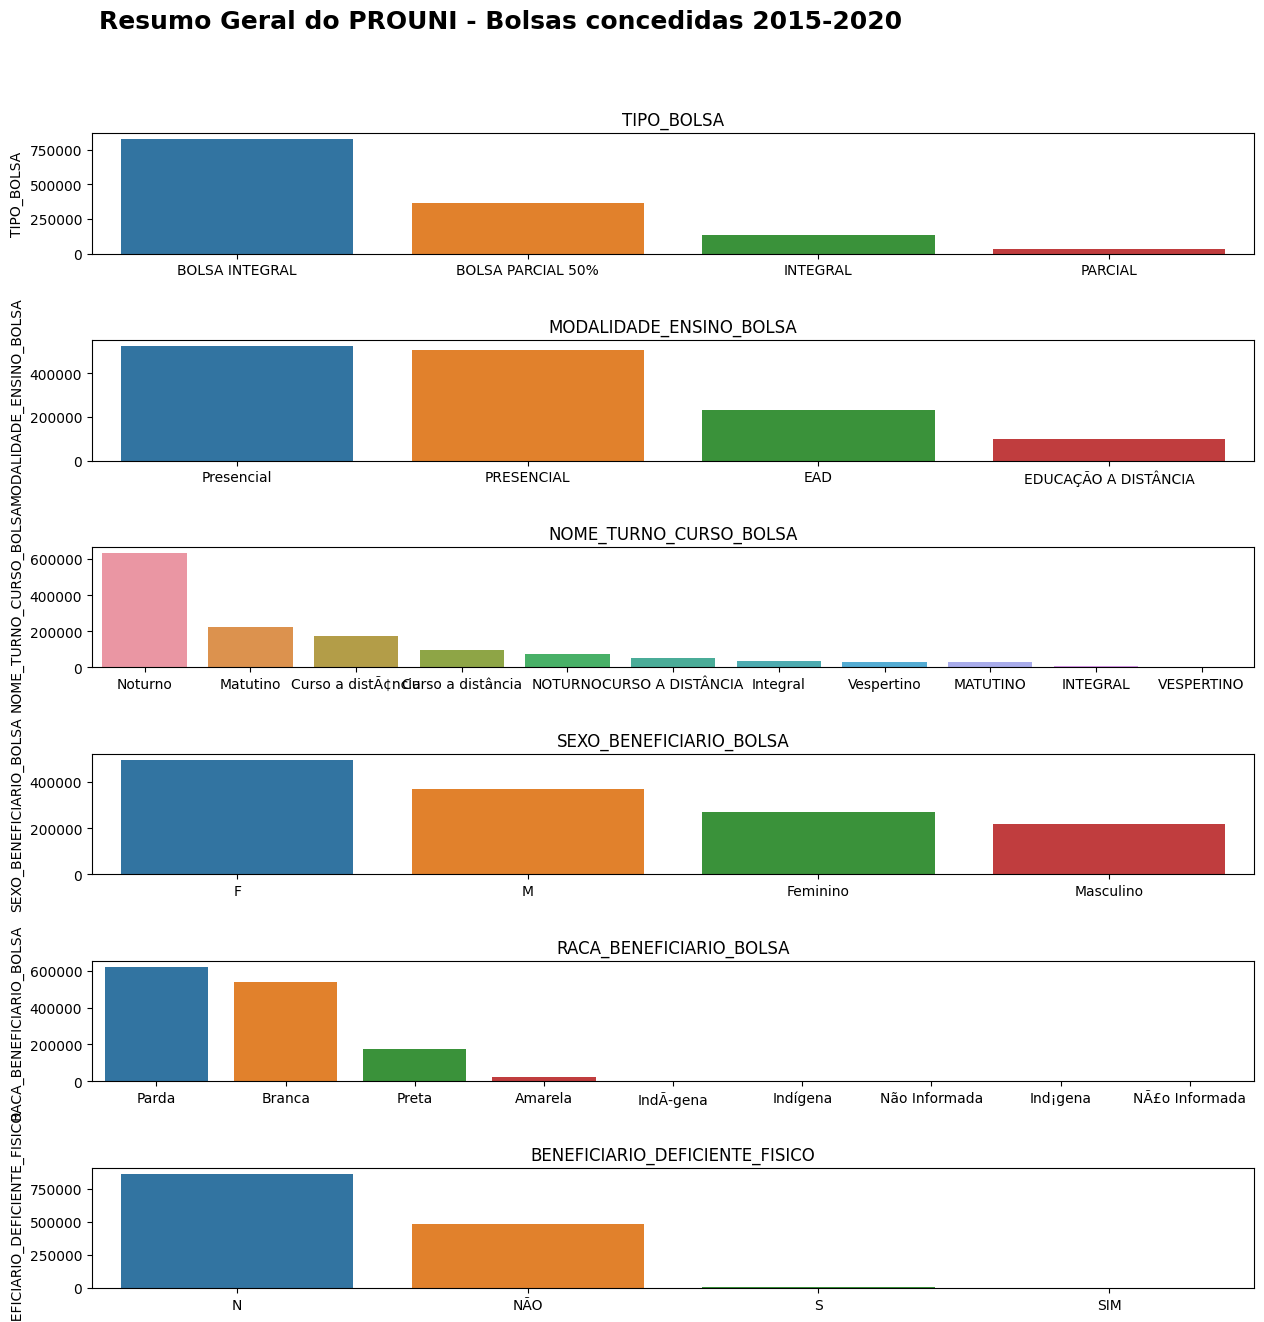

In [147]:
cols = ['TIPO_BOLSA', 'MODALIDADE_ENSINO_BOLSA',
        'NOME_TURNO_CURSO_BOLSA', 'SEXO_BENEFICIARIO_BOLSA',
        'RACA_BENEFICIARIO_BOLSA', 'BENEFICIARIO_DEFICIENTE_FISICO']

fig, axs = plt.subplots(6, 1, figsize=(15, 15))#, sharey=True)
fig.subplots_adjust(hspace = .72, wspace=.72)
axs = axs.ravel()

for i in range(len(cols)):
    series_inter = df_prouni[cols[i]].value_counts()
    sns.barplot(ax=axs[i], x=series_inter.index, y=series_inter)
    axs[i].set_title(cols[i])

fig.text(0.13, 0.95, 'Resumo Geral do PROUNI - Bolsas concedidas 2015-2020',
         fontsize=18, fontweight='bold', fontfamily='garamond')
plt.show()

Para uma boa análise compararei os dados gerais (2005-2020) com o ano mais recente (2020)

In [148]:
df_2020 = df[df['ANO_CONCESSAO_BOLSA'] == 2020]

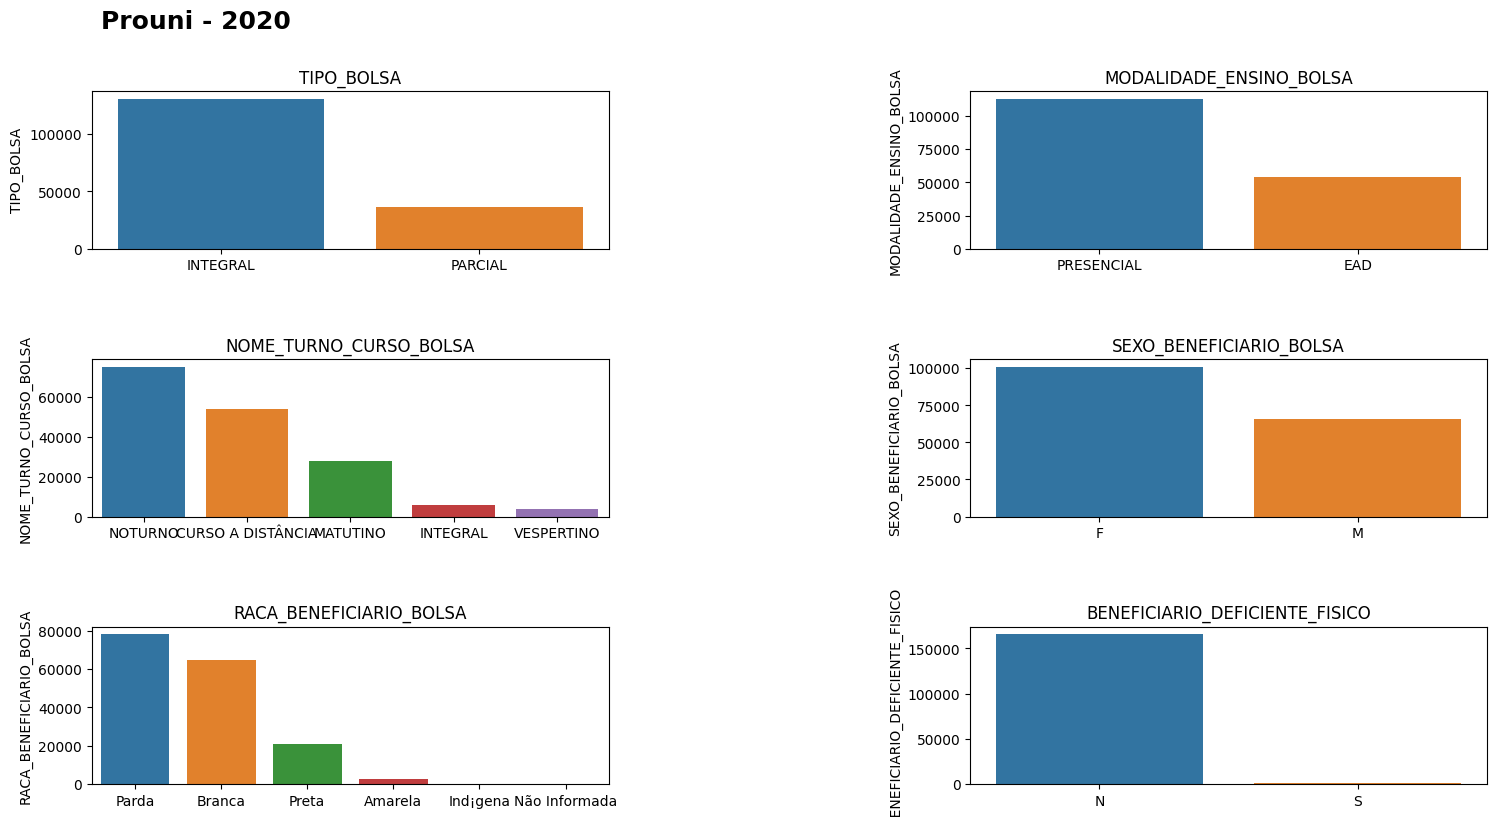

In [149]:
 cols = ['TIPO_BOLSA', 'MODALIDADE_ENSINO_BOLSA',
        'NOME_TURNO_CURSO_BOLSA', 'SEXO_BENEFICIARIO_BOLSA',
        'RACA_BENEFICIARIO_BOLSA', 'BENEFICIARIO_DEFICIENTE_FISICO']

fig, axs = plt.subplots(3, 2, figsize=(18, 9))#, sharey=True)
fig.subplots_adjust(hspace = .7, wspace=.7)
axs = axs.ravel()

for i in range(len(cols)):
    series_inter = df_2020[cols[i]].value_counts()
    sns.barplot(ax=axs[i], x=series_inter.index, y=series_inter)
    axs[i].set_title(cols[i])


fig.text(0.13, 0.95, 'Prouni - 2020',
         fontsize=18, fontweight='bold', fontfamily='garamond')
plt.show()

### Comparação geral e ano atual
É interessante notar como alguns recursos mudaram:
* TIPO_BOLSA: o tipo de bolsas hoje em dia são apenas integrais ou parciais (50%) as parciais (25%) não existem mais
* NOME_TURNO_CURSO_BOLSA: houve um aumento de aulas sendo ministradas ‘à distância’ (e isso foi antes da pandemia)
* SEXO_BENEFICIARIO: a proporção entre homem e mulher vem aumentando a favor da mulher
* RACA_BENEFICIARIO_BOLSA: pessoas autodeclaradas 'pardas brasileiras' aumentaram e agora são mais frequentes do que autodeclaradas brancas

### Universidades (IES) mais populares
Por ser o programa do PROUNI, as universidades listadas são as particulares.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


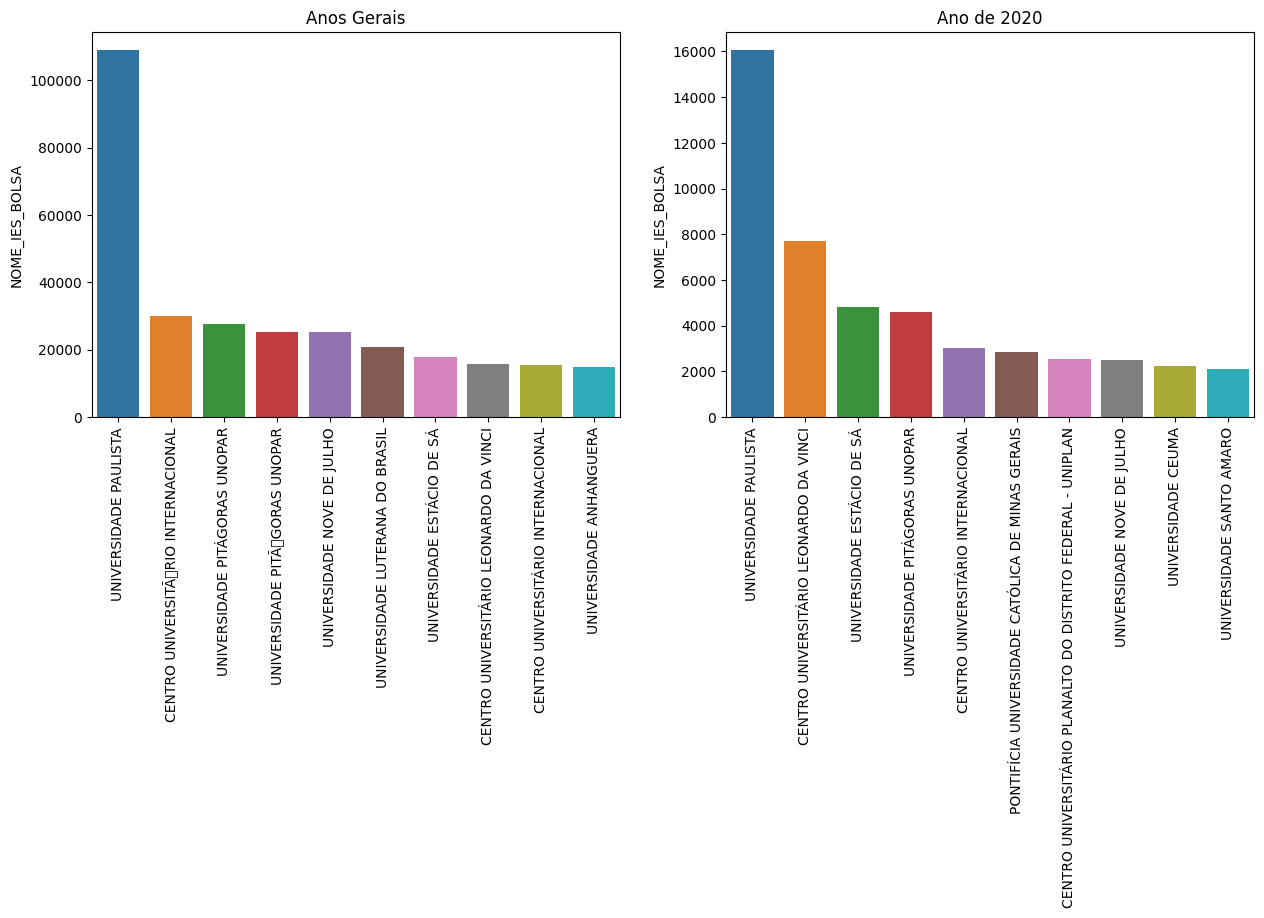

In [151]:
fig, axs = plt.subplots(1,2, figsize=(15, 5))

inst_top_10 = df_prouni['NOME_IES_BOLSA'].value_counts()[:10]
sns.barplot(ax=axs[0], x=inst_top_10.index, y=inst_top_10)
axs[0].set_xticklabels(inst_top_10.index, rotation=90)
axs[0].set_title('Anos Gerais')

inst_top_10_2020 = df_2020['NOME_IES_BOLSA'].value_counts()[:10]
sns.barplot(ax=axs[1], x=inst_top_10_2020.index, y=inst_top_10_2020)
axs[1].set_xticklabels(inst_top_10_2020.index, rotation=90)
axs[1].set_title('Ano de 2020')
plt.show()

### Cursos mais populares

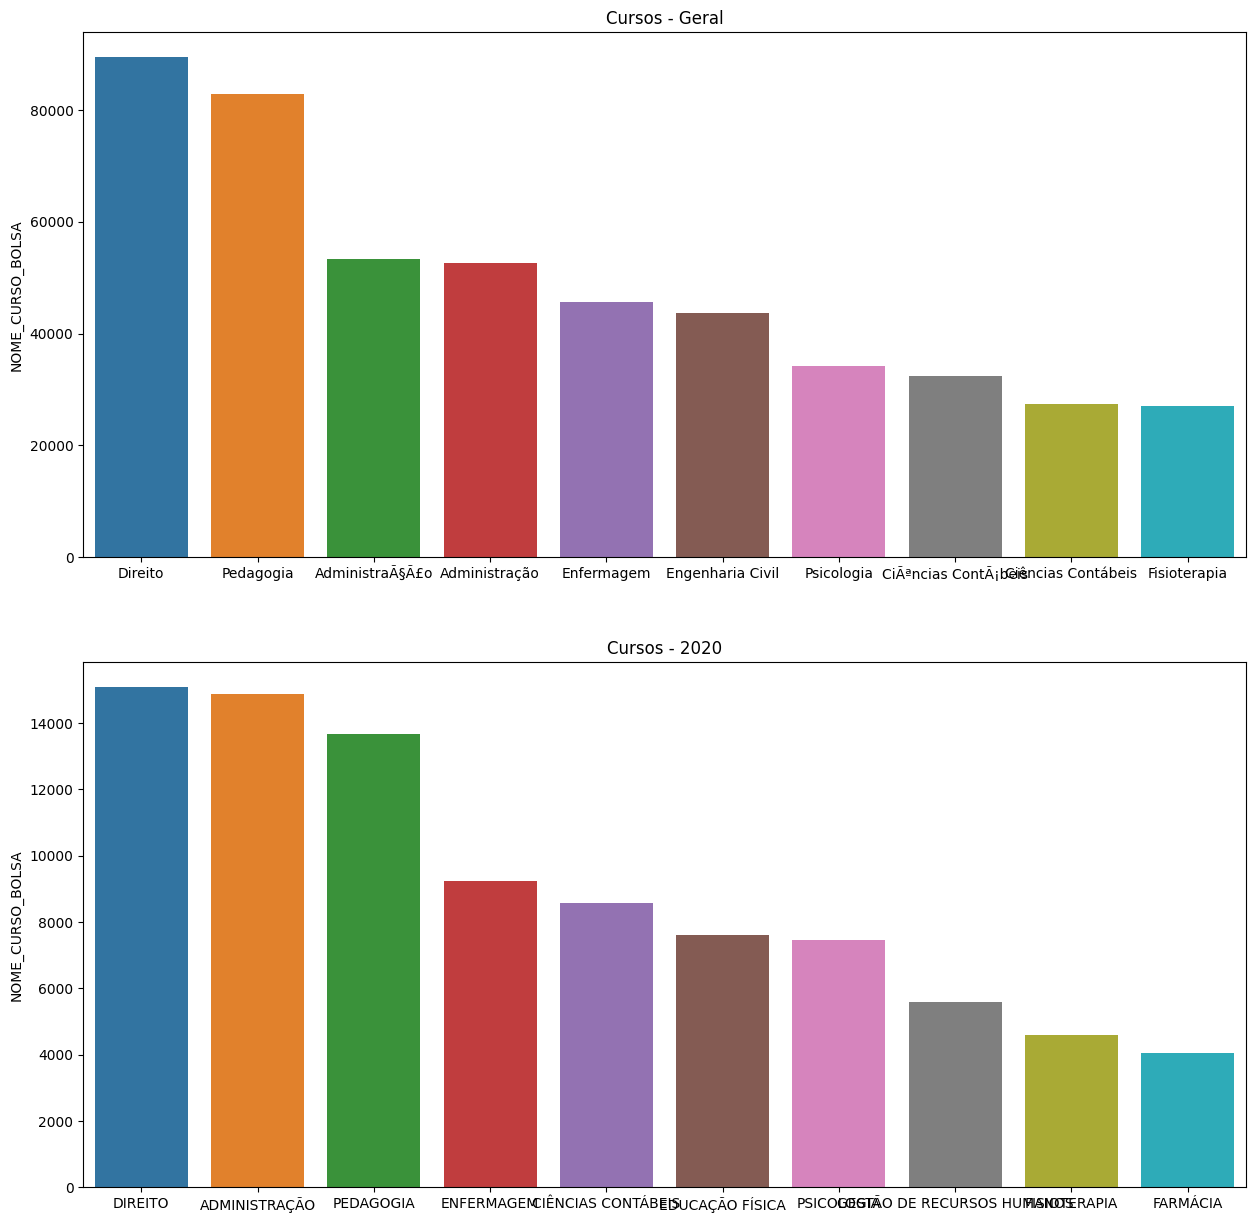

In [153]:
fig, axs = plt.subplots(2,1, figsize=(15, 15))

curso_top_10 = df_prouni['NOME_CURSO_BOLSA'].value_counts()[:10]
sns.barplot(ax=axs[0], x=curso_top_10.index, y=curso_top_10)
axs[0].set_title('Cursos - Geral')

curso_top_10_2020 = df_2020['NOME_CURSO_BOLSA'].value_counts()[:10]
sns.barplot(ax=axs[1], x=curso_top_10_2020.index, y=curso_top_10_2020)
axs[1].set_title('Cursos - 2020')
plt.show()

###Distribuição Ano a Ano e por UF

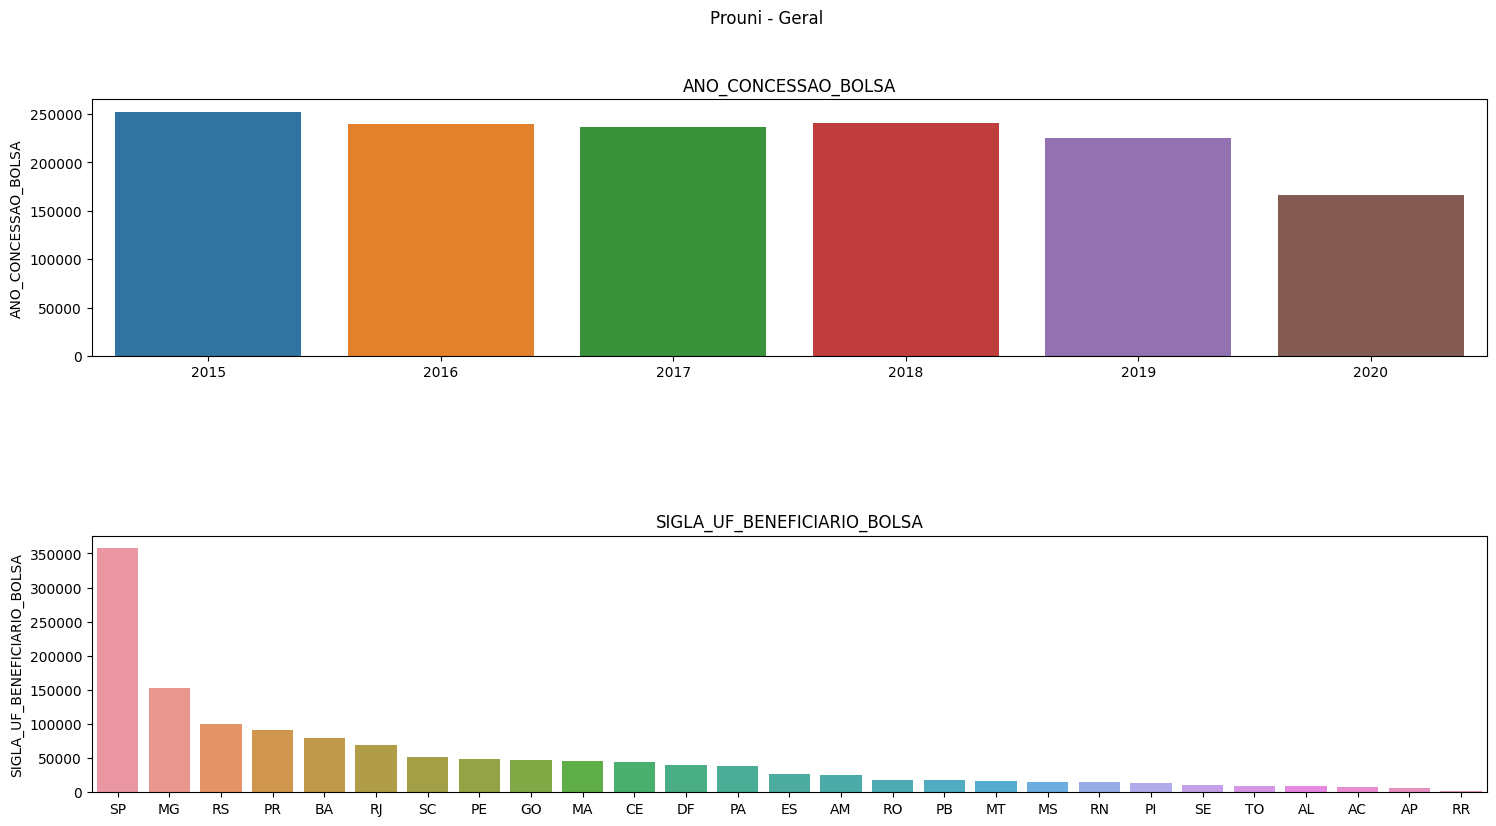

In [166]:
cols = ['ANO_CONCESSAO_BOLSA', 'SIGLA_UF_BENEFICIARIO_BOLSA']

fig, axs = plt.subplots(2, 1, figsize=(18, 9))#, sharey=True)
fig.subplots_adjust(hspace = .7, wspace=.7)
fig.suptitle('Prouni - Geral')
axs = axs.ravel()

for i in range(len(cols)):
    series_inter = df_prouni[cols[i]].value_counts()
    sns.barplot(ax=axs[i], x=series_inter.index, y=series_inter)
    axs[i].set_title(cols[i])
plt.show()

####Diminuição de bolsas a partir de  2016
O maior número de bolsas consedidas foi em 2015, mas coincidentemente depois de 2016 (quando a presidente Dilma Rousseff sofreu impeachment) o valor tem diminuído lentamente. Não podemos confirmar uma correlação desses eventos, pois precisariamos de mais dados para comprovar essa tese. Porém é um ponto de atenção.

```
# Isto está formatado como código
```



In [167]:
print("Geral: {0:.0%} de estudantes do Estado de São Paulo.".format(series_inter['SP'] / series_inter.sum()))

Geral: 26% de estudantes do Estado de São Paulo.


#### SP concentra mais bolsas
São Paulo é o maior estado em população, então faz sentido que seja também o que tem o maior número de alunos participantes deste programa.

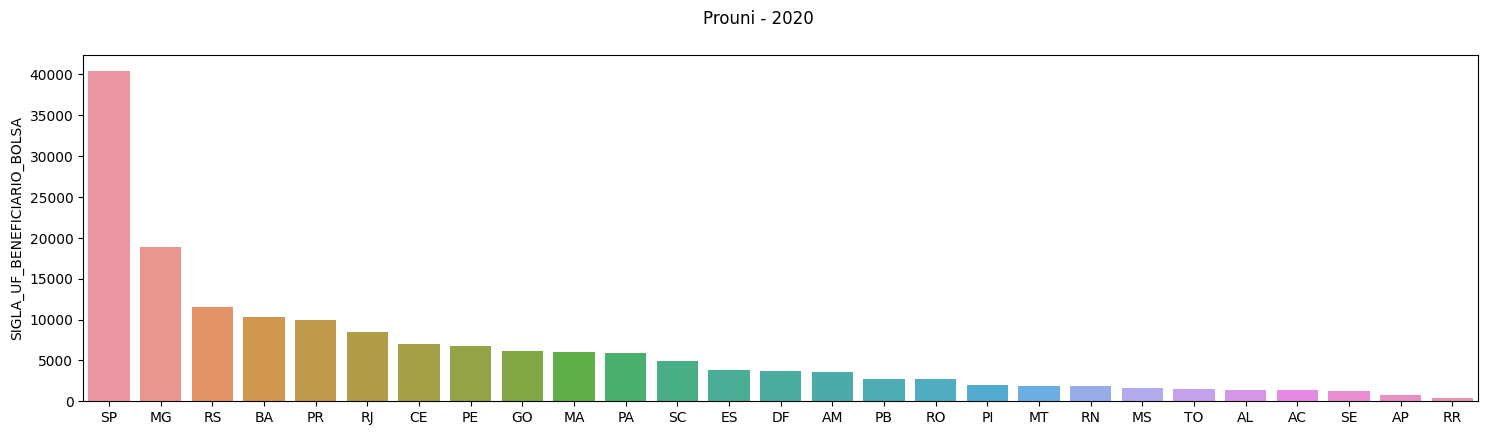

In [169]:
fig, axs = plt.subplots(1, 1, figsize=(18, 4.5))#, sharey=True)

fig.subplots_adjust(hspace = .7, wspace=.7)
fig.suptitle('Prouni - 2020')

series_inter = df_2020['SIGLA_UF_BENEFICIARIO_BOLSA'].value_counts()

sns.barplot(ax=axs, x=series_inter.index, y=series_inter)
plt.show()

In [170]:
print("2020: {0:.0%} de alunos de São Paulo.".format(series_inter['SP'] / series_inter.sum()))

2020: 24% de alunos de São Paulo.
